Student name: Alessandro Gostoli

Student id: 23251107

# Task: Deep neural networks

#### Imports

In [47]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [48]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/home/ale/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

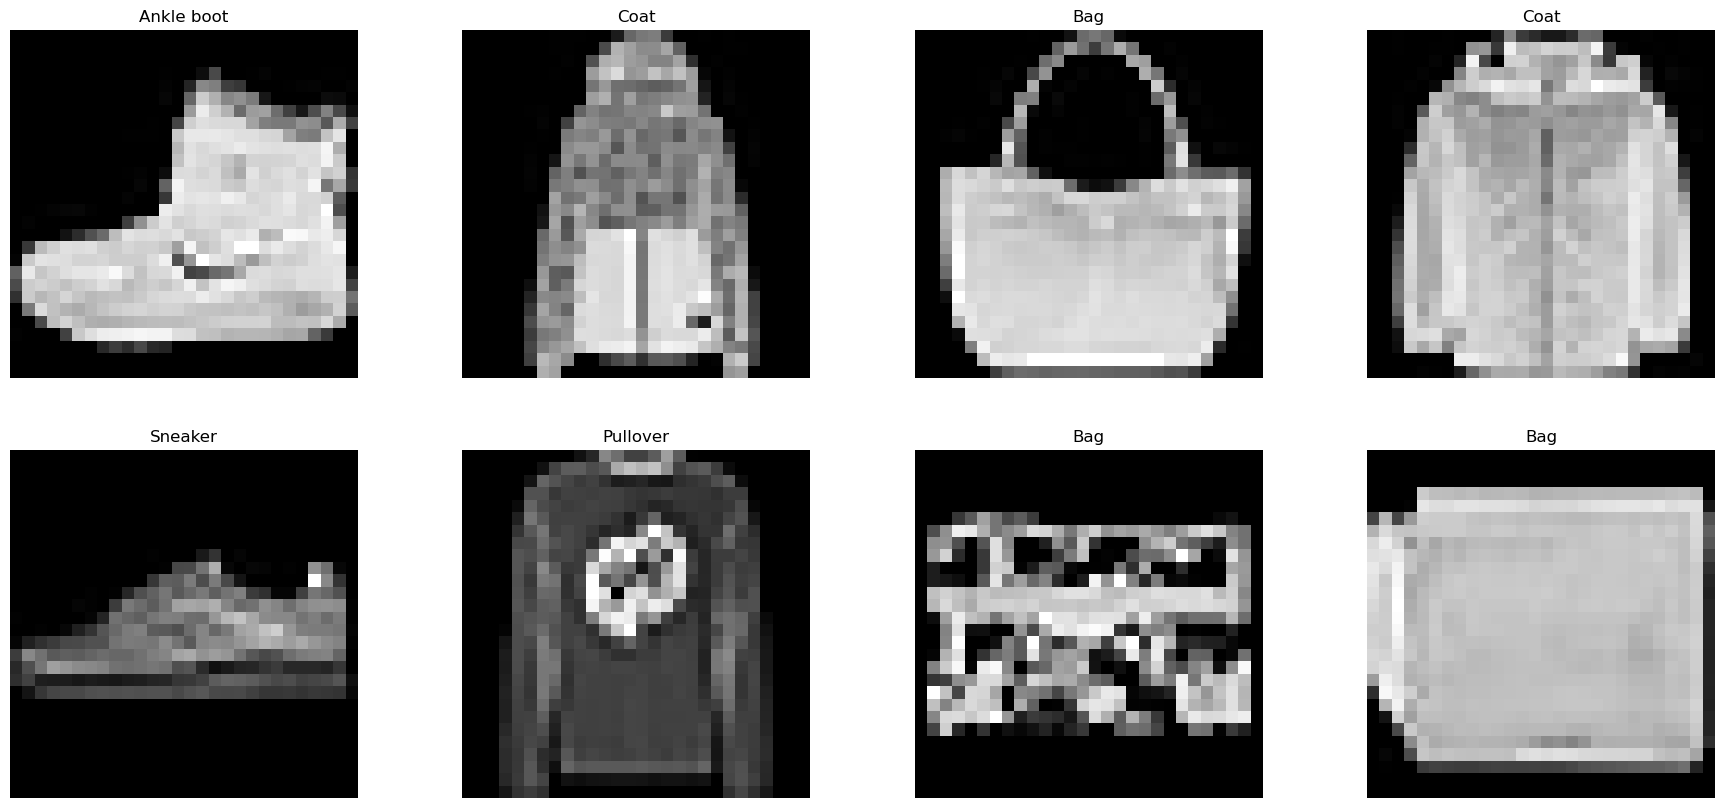

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [51]:
from sklearn.linear_model import Perceptron as Perceptron 

ppn = Perceptron()
ppn.fit(X_train_scaled, y_train)



Perceptron()

In [52]:
from sklearn.metrics import accuracy_score

y_pred = ppn.predict(X_test_scaled)

acc = accuracy_score(y_test,y_pred)

print(f"Accuracy = {acc}")


Accuracy = 0.8069285714285714


<font color='red'>Enter your text here</font>

## 3
I think that in our case 0.80 accuracy is not that good since it means that it fails at classification once every 5 sample. That's why i would say that we need an higher accuracy for our model.

## 4

I found the first misclassified example in the predictions and i plotted its image. It is very difficult to understand what the image represents but in this case the model classified a shirt as a pullover. I would say that the two classes are very similar clothing item so it make sense that it struggle more in this classification than in other ones where the clothing item are significantly different 

Wrong prediction = Pullover
Real class = Shirt


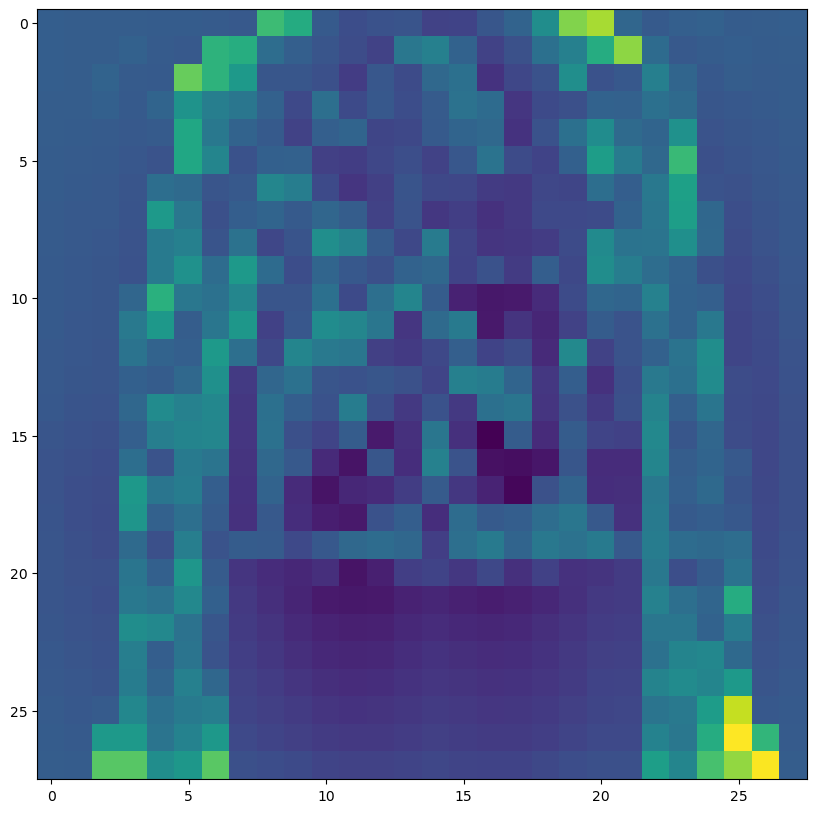

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        print(f"Wrong prediction = {text_labels[int(y_pred[i])]}")
        print(f"Real class = {text_labels[int(y_test[i])]}")
        plt.imshow(np.reshape(X_test_scaled[i], (-1, 28)))
        
        plt.show()

        plt.show()
        break
    


## 5

The way a multi-class perceptron work is very similar to the binary one. It has a input layer with as many nodes as the number of features. This values are multiplied by some weights. Subsequently the obtained weighted sum of the values is passed to the activation function. Here comes the difference between binary and multi-class perceptron, in fact there are as many output neurons as the number of classes we want to predict, instead of a single neuron giving as output either 1 or 0. Each output neuron is able to distinguish if a certain input can fall in the class which it reconize or not. Usually in multi-class perceptron softmax activation function is used. When that function is used each output neuron return as output the probability of the input being part of the class the neuron reconizes. During prediction, the class with the highest probability is chosen as the final predicted class. The training process is the same as the binary perceptron.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,). 

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [54]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20,), random_state=1, alpha=0.1, verbose=1).fit(X_train_scaled, y_train)
nn_pred_y = clf.predict(X_test)


Iteration 1, loss = 0.63949593
Iteration 2, loss = 0.43450261
Iteration 3, loss = 0.40207574
Iteration 4, loss = 0.38022999
Iteration 5, loss = 0.36728924
Iteration 6, loss = 0.35780703
Iteration 7, loss = 0.34773033
Iteration 8, loss = 0.34181939
Iteration 9, loss = 0.33489873
Iteration 10, loss = 0.32926184
Iteration 11, loss = 0.32561696
Iteration 12, loss = 0.32146271
Iteration 13, loss = 0.31825150
Iteration 14, loss = 0.31386332
Iteration 15, loss = 0.31107372
Iteration 16, loss = 0.30956362
Iteration 17, loss = 0.30648735
Iteration 18, loss = 0.30565991
Iteration 19, loss = 0.30185399
Iteration 20, loss = 0.30047796
Iteration 21, loss = 0.29856088
Iteration 22, loss = 0.29672392
Iteration 23, loss = 0.29683444
Iteration 24, loss = 0.29311680
Iteration 25, loss = 0.29102552
Iteration 26, loss = 0.29156721
Iteration 27, loss = 0.28991414
Iteration 28, loss = 0.28866048
Iteration 29, loss = 0.28896373
Iteration 30, loss = 0.28584656
Iteration 31, loss = 0.28579411
Iteration 32, los

In [55]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,nn_pred_y)

print(f"Accuracy = {acc}")

Accuracy = 0.7287857142857143


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

<font color='red'>Enter your text here</font>

## 1
The size of input layer just depends on the number of features we have in our dataset, so in our case is 785

## 2
The size of output layer just depends on the number of classes we want to predict, so in our case 10.

## 3
The total number of weights the algorithm learn is calculated as (size of input layer * size of hidden layer * size of output layer), which in our case is = (785 * 20 * 10) = 157000

## 4
It is common that training and test accuracies are different due to many factors. If the training test is significantly higher then the test set it means that the model is overfitted to the training data. If in the opposite case the model is underfitted it will have bad scores in both the accuracies. 

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import time

a_test_ = []
a_train_ = []
widths = (20, 50, 100, 200)

for val in widths:
    start = time.time()

# insert some code to do something here

    clf = MLPClassifier(hidden_layer_sizes=(val,), random_state=42, alpha=0.001, verbose=1).fit(X_train_scaled, y_train)
    
    nn_pred = clf.predict(X_test_scaled)
    nn_pred_train = clf.predict(X_train_scaled)

    acc = accuracy_score(y_test,nn_pred)
    acc_train = accuracy_score(y_train,nn_pred_train)

    a_test_.append(acc)
    a_train_.append(acc_train)
    end = time.time()
    print(f"Run time {val} [s]: ",end-start)



Iteration 1, loss = 0.63849944
Iteration 2, loss = 0.41998448
Iteration 3, loss = 0.38384610
Iteration 4, loss = 0.36179433
Iteration 5, loss = 0.34563315
Iteration 6, loss = 0.33425887
Iteration 7, loss = 0.32319029
Iteration 8, loss = 0.31568614
Iteration 9, loss = 0.30890412
Iteration 10, loss = 0.30225346
Iteration 11, loss = 0.29594443
Iteration 12, loss = 0.29108048
Iteration 13, loss = 0.28711428
Iteration 14, loss = 0.28321784
Iteration 15, loss = 0.27776591
Iteration 16, loss = 0.27383339
Iteration 17, loss = 0.27057090
Iteration 18, loss = 0.26618698
Iteration 19, loss = 0.26522250
Iteration 20, loss = 0.26175118
Iteration 21, loss = 0.25839523
Iteration 22, loss = 0.25542304
Iteration 23, loss = 0.25388766
Iteration 24, loss = 0.24949856
Iteration 25, loss = 0.24729749
Iteration 26, loss = 0.24538469
Iteration 27, loss = 0.24286638
Iteration 28, loss = 0.24051047
Iteration 29, loss = 0.24066139
Iteration 30, loss = 0.23631139
Iteration 31, loss = 0.23419776
Iteration 32, los

/home/ale/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Run time 20 [s]:  207.2180142402649
Iteration 1, loss = 0.52843311
Iteration 2, loss = 0.37042459
Iteration 3, loss = 0.33255719
Iteration 4, loss = 0.30926590
Iteration 5, loss = 0.28958032
Iteration 6, loss = 0.27748269
Iteration 7, loss = 0.26295169
Iteration 8, loss = 0.25088217
Iteration 9, loss = 0.24169088
Iteration 10, loss = 0.23225571
Iteration 11, loss = 0.22552658
Iteration 12, loss = 0.21883555
Iteration 13, loss = 0.21112587
Iteration 14, loss = 0.20234461
Iteration 15, loss = 0.19810741
Iteration 16, loss = 0.19236018
Iteration 17, loss = 0.18711008
Iteration 18, loss = 0.18297613
Iteration 19, loss = 0.17595649
Iteration 20, loss = 0.17241076
Iteration 21, loss = 0.16917467
Iteration 22, loss = 0.16622923
Iteration 23, loss = 0.15810061
Iteration 24, loss = 0.15539623
Iteration 25, loss = 0.15371815
Iteration 26, loss = 0.15059625
Iteration 27, loss = 0.14763341
Iteration 28, loss = 0.14151551
Iteration 29, loss = 0.14093266
Iteration 30, loss = 0.13564765
Iteration 31,

In [57]:
print(a_test_)
print(a_train_)

[0.8562142857142857, 0.8652857142857143, 0.8827857142857143, 0.8793571428571428]
[0.9564642857142858, 0.9957857142857143, 0.9939107142857143, 0.9839285714285714]


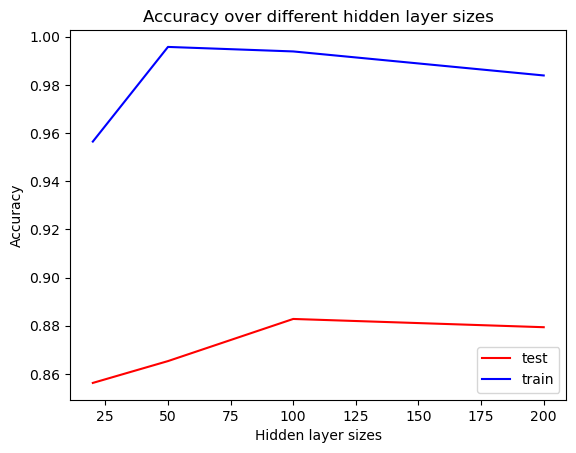

In [58]:
import matplotlib.pyplot as plt

plt.xlabel("Hidden layer sizes") 
plt.ylabel("Accuracy") 
plt.title("Accuracy over different hidden layer sizes")

plt.plot(widths, a_test_, color='r', label='test') 
plt.plot(widths, a_train_, color='b', label='train')

plt.legend()

plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

## 1

The following are the amount of time it took each different size to run:

Run time 20 [s]:  207.2180142402649

Run time 50 [s]:  536.1898260116577

Run time 100 [s]:  725.0246539115906

Run time 200 [s]:  656.1413955688477

I can notice that the time required is increasing with the size of the hidden layer but in the last run using 200 as size the algorithm stopped much earlier than in the other runs because the accuracy was not improving. In fact the last run was faster than the one with 100 neurons.

## 2 
I think the best number of neurons that i tested is 100 since the difference in accuracies with the previous setup with 50 neurons is important while it is not with the next setup where i used 200 neurons. From 50 to 100 i improved the test accuracy by 0.013 while from 100 to 200 only by 0.007 using 100 neurons more instead of 50 more. That's why i believe that 100 neurons is the setup where you can find the best balance between performance and number of neurons.
In this setup the algorithm learns 785 * 100 * 10 = 785000 weights.
I think there is an evidence of overfitting. We can get this looking at the accuracy on test data being much lower than the one on training data. Another sign on overfitting is that from 100 to 200 neurons run the accuracy on test data decresed and on training data increased. This is a clear sign that the model learnt too well the training data and is not capable at generalizing on unseen data. Some methods we can use to mitigate overfitting are cross-validation, regularization and using more data. Sometimes the model is not able to generalize to unseen data because of the size of training data. In these cases the model in not able to learn the patterns in the data. In our case i would try to do cross-validation to be able to vary more the traning data and then been able to perform better on unseen data. Another useful method we can apply in our case is regularization which can help to penalize too complex functions which could cause overfitting.

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [59]:
layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []

for val in layers:
    clf = MLPClassifier(hidden_layer_sizes=val, random_state=42, alpha=0.001, verbose=1).fit(X_train_scaled, y_train)
    
    nn_pred = clf.predict(X_test_scaled)
    nn_pred_train = clf.predict(X_train_scaled)

    acc = accuracy_score(y_test,nn_pred)
    acc_train = accuracy_score(y_train,nn_pred_train)

    a_test.append(acc)
    a_train.append(acc_train)




Iteration 1, loss = 0.68212231
Iteration 2, loss = 0.41377912
Iteration 3, loss = 0.37726727
Iteration 4, loss = 0.35386493
Iteration 5, loss = 0.33909348
Iteration 6, loss = 0.32658933


Iteration 7, loss = 0.31522282
Iteration 8, loss = 0.30829669
Iteration 9, loss = 0.30035369
Iteration 10, loss = 0.29326739
Iteration 11, loss = 0.28647617
Iteration 12, loss = 0.28085120
Iteration 13, loss = 0.27580108
Iteration 14, loss = 0.27128675
Iteration 15, loss = 0.26660340
Iteration 16, loss = 0.26223464
Iteration 17, loss = 0.26165517
Iteration 18, loss = 0.25639972
Iteration 19, loss = 0.25363189
Iteration 20, loss = 0.24878848
Iteration 21, loss = 0.24497790
Iteration 22, loss = 0.24261953
Iteration 23, loss = 0.24014772
Iteration 24, loss = 0.23809000
Iteration 25, loss = 0.23486343
Iteration 26, loss = 0.23224083
Iteration 27, loss = 0.22809514
Iteration 28, loss = 0.22758170
Iteration 29, loss = 0.22564413
Iteration 30, loss = 0.22407195
Iteration 31, loss = 0.22029554
Iteration 32, loss = 0.21867654
Iteration 33, loss = 0.21878939
Iteration 34, loss = 0.21664334
Iteration 35, loss = 0.21411454
Iteration 36, loss = 0.21159087
Iteration 37, loss = 0.21029842
Iteration 3

/home/ale/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.77065126
Iteration 2, loss = 0.42082594
Iteration 3, loss = 0.37755356
Iteration 4, loss = 0.35576684
Iteration 5, loss = 0.33821028
Iteration 6, loss = 0.32642198
Iteration 7, loss = 0.31602971
Iteration 8, loss = 0.30663607
Iteration 9, loss = 0.29825365
Iteration 10, loss = 0.29296573
Iteration 11, loss = 0.28576621
Iteration 12, loss = 0.27974415
Iteration 13, loss = 0.27390085
Iteration 14, loss = 0.27100987
Iteration 15, loss = 0.26499810
Iteration 16, loss = 0.26134435
Iteration 17, loss = 0.25796170
Iteration 18, loss = 0.25407962
Iteration 19, loss = 0.25040040
Iteration 20, loss = 0.24721499
Iteration 21, loss = 0.24380147
Iteration 22, loss = 0.24221703
Iteration 23, loss = 0.23757143
Iteration 24, loss = 0.23585436
Iteration 25, loss = 0.23258367
Iteration 26, loss = 0.23158783
Iteration 27, loss = 0.22937688
Iteration 28, loss = 0.22667452
Iteration 29, loss = 0.22407591
Iteration 30, loss = 0.22179809
Iteration 31, loss = 0.21922529
Iteration 32, los

/home/ale/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.58005252
Iteration 2, loss = 0.37446723
Iteration 3, loss = 0.33615544
Iteration 4, loss = 0.30895376
Iteration 5, loss = 0.29218533
Iteration 6, loss = 0.27546729
Iteration 7, loss = 0.26520058
Iteration 8, loss = 0.25152321
Iteration 9, loss = 0.24288382
Iteration 10, loss = 0.23224112
Iteration 11, loss = 0.22563668
Iteration 12, loss = 0.21813785
Iteration 13, loss = 0.20953534
Iteration 14, loss = 0.20209356
Iteration 15, loss = 0.19885941
Iteration 16, loss = 0.18964597
Iteration 17, loss = 0.18341848
Iteration 18, loss = 0.17887187
Iteration 19, loss = 0.17751407
Iteration 20, loss = 0.17024947
Iteration 21, loss = 0.16387768
Iteration 22, loss = 0.16078398
Iteration 23, loss = 0.15777766
Iteration 24, loss = 0.15217803
Iteration 25, loss = 0.14739891
Iteration 26, loss = 0.14557378
Iteration 27, loss = 0.14183242
Iteration 28, loss = 0.13760329
Iteration 29, loss = 0.13298583
Iteration 30, loss = 0.13254279
Iteration 31, loss = 0.12788325
Iteration 32, los

In [60]:
print(a_test)
print(a_train)

[0.8555714285714285, 0.8507142857142858, 0.8700714285714286, 0.8847857142857143]
[0.9550357142857143, 0.9627857142857142, 0.9953035714285714, 0.9965]


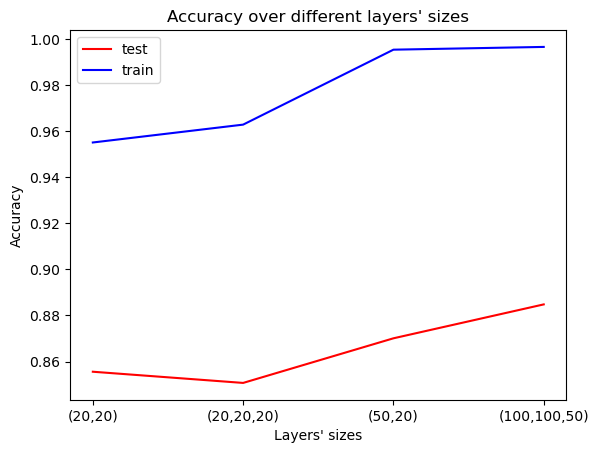

In [61]:
import matplotlib.pyplot as plt

plt.xlabel("Layers' sizes") 
plt.ylabel("Accuracy") 
plt.title("Accuracy over different layers' sizes") 

plt.plot(["(20,20)","(20,20,20)","(50,20)","(100,100,50)"], a_test, color='r', label='test') 
plt.plot(["(20,20)","(20,20,20)","(50,20)","(100,100,50)"], a_train, color='b', label='train')

plt.legend()

plt.show()

#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>Enter your text here</font>

In the first 3 layers' structure we used less neurons than in the previous task and some of them are performing better than a single layer with an higher number of neurons. In fact the structure (50,20) is made by 70 neurons but is perfoming better than the single hidden layer structure of size = 100. I think it can be explained by the fact that even if we have fewer neurons we have more weights since we need to multiply together the sizes of the hidden layer. Instead of having 785 * 100 * 10 = 785000 weights we have 785 * 50 * 20 * 10 = 7850000 weights, 10 times higher number. In general we can say that as seen in the previous task the model is overfitting the training data reaching 0.99 accuracy. 

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

In [62]:
from sklearn.metrics import confusion_matrix

clf = MLPClassifier(hidden_layer_sizes=(100,100,50), random_state=42, alpha=0.001, verbose=1).fit(X_train_scaled, y_train)
    
nn_pred = clf.predict(X_test)




Iteration 1, loss = 0.51098533


Iteration 2, loss = 0.34145786
Iteration 3, loss = 0.30150719
Iteration 4, loss = 0.27348366
Iteration 5, loss = 0.25483237
Iteration 6, loss = 0.23465660
Iteration 7, loss = 0.22016864
Iteration 8, loss = 0.20528501
Iteration 9, loss = 0.19483532
Iteration 10, loss = 0.17776949
Iteration 11, loss = 0.17208608
Iteration 12, loss = 0.15974312
Iteration 13, loss = 0.15275438
Iteration 14, loss = 0.14366268
Iteration 15, loss = 0.13378512
Iteration 16, loss = 0.13124689
Iteration 17, loss = 0.11917017
Iteration 18, loss = 0.11432747
Iteration 19, loss = 0.10908526
Iteration 20, loss = 0.10611917
Iteration 21, loss = 0.09792326
Iteration 22, loss = 0.09505308
Iteration 23, loss = 0.09039698
Iteration 24, loss = 0.08419730
Iteration 25, loss = 0.07504918
Iteration 26, loss = 0.07660756
Iteration 27, loss = 0.07247818
Iteration 28, loss = 0.06725573
Iteration 29, loss = 0.06883816
Iteration 30, loss = 0.06217932
Iteration 31, loss = 0.06996874
Iteration 32, loss = 0.06396842
Iteration 33, lo

[[1163    6   67    3   70    0   43    0   46    2]
 [  27 1247   29   17   72    0    0    0    7    1]
 [  98    1  428    0  607    0  252    1   13    0]
 [ 493    8   90  316  427    0   18    1   38    9]
 [  90    1   38    0 1208    0   48    0   15    0]
 [  37    7   14   24   80  406   28   65  597  142]
 [ 449    0   70    2  488    1  366    0   24    0]
 [ 382    0    0    2    2    0    8  126  857   23]
 [  84    0   14    2   31    0   12    0 1257    0]
 [ 280    0    0    2    0    0   81   42   39  956]]


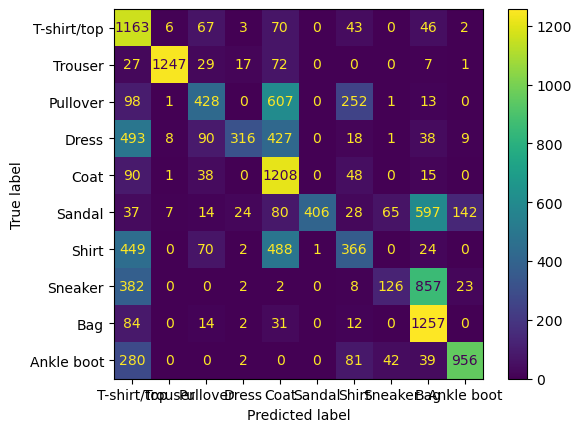

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay


conf_matrix = confusion_matrix(y_test, nn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=text_labels)
disp.plot()

print(conf_matrix)

<font color='red'>Enter your text here</font>

Looking at the confusion matrix i can easily notice that some features are much bettr classified than others. Trousers is the best reconized class since has few false positive and false negative. T-shirt/top, bag and coat have good precision but poor recall. The model seems to have a big problem at classifing sneakers since most of the times it classify them as a bag. The same behavior is noticed for the sandals. Also dresses are poorly classified and the model often classify them as coat or t-shirt. Ankle boot are relatively well predicted. Shirt are often misclassified as shirt or coat. In general the model has some problems with clothing item which have similar shape.